**Actividad Semanal 4**

por:

Mario Alberto Sangines Estala A01328170

Héctor Raúl Vázquez Gonzaléz A00565542

El objetivo de esta actividad es el cálculo de las PCA de una base de datos que se nos provee.

El primer paso que haremos será recuperar la BD, después se va a realizar una limpieza de datos. Para luego llevar a cabo el proceso del cálculo del PCA. Y por último, la identificaciòn de datos atípicos.

1.- Recuperación de la información

In [27]:
#Se importan las librerías que se necesitarán
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
'''
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold'''

'\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import MinMaxScaler, OneHotEncoder\n\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.svm import SVC\n\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.model_selection import RepeatedStratifiedKFold'

In [28]:


#Se recupera la información de la BD y se guarda en una variable
info = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

#La informaciòn se transfiere a un Dataframe de pandas para trabajar de una manera más fácil
df = pd.read_csv(info)

#Se verifica si la información contiene algunos nulos
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

**2.- Limpieza de Datos**

Ahora, la técnica a utilizar será la de rellenar los espacios nulos con el promedio o la moda, según el caso más conveniente. Se ha acordado que las columnas x1,x5-x23 sean rellenadas con el promedio y las columnas x2-x4 con la moda.

In [53]:
from os import truncate
newDF = df.copy() #Se hace una copia del DataFarme
print("Total de Registros: "+ str(len(newDF)))



def llenaPromedio():
  for c in range(5,24):
    newDF["X"+str(c)].fillna(value = newDF["X"+str(c)].mean(), inplace = True)

def llenaMedian():
  for c in range(2,5):
    newDF["X"+str(c)].fillna(value = newDF["X"+str(c)].median(), inplace = True)
    


llenaPromedio()
llenaMedian()

print("Total de Registros después de eliminar los nulos: "+ str(len(newDF)))
newDF.isnull().any() #Se checa si el dataframe aún tiene registros nulos

Total de Registros: 30000
Total de Registros después de eliminar los nulos: 30000


ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y       True
dtype: bool

Vamos a eliminar las Columnas Categóricas, las cuales son:

x2: Género

x3: Educaión

x4: Estado Civil

Y: Resultado (Aprovado/No Aprovado)

In [30]:
newDF.drop(["X2","X3","X4","Y"],axis=1, inplace = True) #Este código solo se puede correr una vez.


In [31]:
newDF.head()
newDF.isnull().any()

ID     False
X1     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
dtype: bool

**3.- Cálculo de PCA**

Se comienza por calcular las variaciones starndart por columna

In [32]:
pcs = PCA()
pcs.fit(newDF)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Standard deviation,166510.7329,115825.4668,37235.1525,27730.2171,20687.3224,20270.2074,18512.5349,17031.7564,16283.1134,11617.8086,...,8791.4592,8691.5547,8108.4387,9.1157,2.0623,0.9394,0.732,0.5963,0.5123,0.4184
Proportion of variance,0.6094,0.2949,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,...,0.0017,0.0017,0.0014,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
Cumulative proportion,0.6094,0.9043,0.9348,0.9517,0.9611,0.9701,0.9776,0.9840,0.9898,0.9928,...,0.9969,0.9986,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000


Se grafica la informacón para tener una manera visual de evaluar la Desviación estandart.

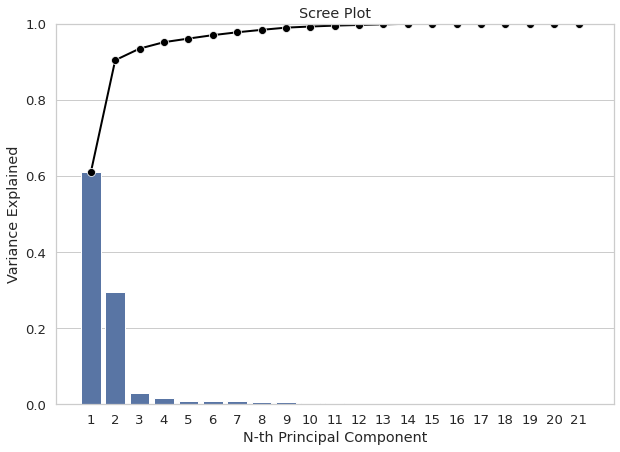

In [33]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Conclución de la Gráfica:

Con los primeros 2 componentes tenemos el poco más del 90.4% de la información, aunque podemos extendernos a un porcentaje mayor, el porcentaje que cada nuevo aspecto aporta es muy bajo en comparaciòn con los primeros dos.

Ahora que ya sabemos que más del 90% de nuestra información está contenida en las primeras dos columnas, podemos comenzar a analizarlas. 

Se crea un nuevo dataframe a partir de nuestra información limpia, con solo la información que utilizaremos.

In [34]:
analisis_df = newDF.iloc[:,1:3]
analisis_df.head()

,X1,X5
0,20000,24.0
1,120000,26.0
2,90000,34.0
3,50000,37.0
4,50000,57.0


Ya que se está tomando la columna de montos de crédito y edad, necesitamos nomralizar los datos a una misma escala.



In [35]:
std_df = pd.DataFrame(preprocessing.scale(analisis_df))
std_df.columns= ["X1","X5"]
std_df

,X1,X5
0,-1.136720,-1.245968
1,-0.365981,-1.028980
2,-0.597202,-0.161028
3,-0.905498,0.164454
4,-0.905498,2.334333
...,...,...
29995,0.404759,0.381442
29996,-0.134759,0.815417
29997,-1.059646,0.164454
29998,-0.674276,0.598430


Se calcula la vairanza de nuestros datos

In [36]:
Variance = np.cov([std_df.X1, std_df.X5])
print("Arreglo de Varianza: \n" + str(Variance))

t= std_df.var().sum() #Cálculo total de Varianza
varX1 =Variance[0][0] #Varianza Total de X1
varX5 = Variance[1][1] #Varianza Total de X5

print("\n")
print('Total Varience \t\t:', t.round(2) )
print('Varience prop. of X1 \t:', ((varX1/t)*100).round(2),'%' )
print('Varience prop. of X5 \t:', ((varX5/t)*100).round(2),'%' )

Arreglo de Varianza: 
[[1.00003333 0.14466728]
 [0.14466728 1.00003333]]


Total Varience 		: 2.0
Varience prop. of X1 	: 50.0 %
Varience prop. of X5 	: 50.0 %


Graficamos nuestra información normalizada

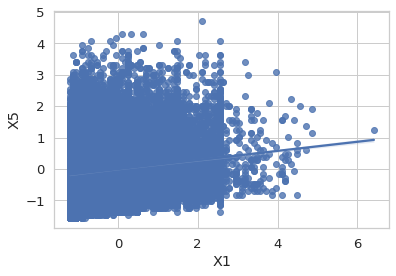

In [37]:
p = sns.regplot(data = df,  
                x = std_df.X1, 
                y = std_df.X5
               ) 
p

Vamos a describir nuestra información

In [38]:
pcs = PCA(n_components=2)

pcs.fit(std_df[['X1', 'X5']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ["X1", "X5"]
pcsSummary

,X1,X5
Standard deviation,1.069907,0.924860
Proportion of variance,0.572331,0.427669
Cumulative proportion,0.572331,1.000000


**4.- Encontrando datos atípicos**

Para realizar el análisis para encontrar los valores atípicos, vamos a utilizar el dataframe que contiene nuestra BD limpia.

Comenzamos con el valor de "X1", con la creación de un histograma y una gráfica de caja:

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: X1, Length: 81, dtype: int64


No. de Montos Diferentes: 81

Montos Menos pedidos: 
1000000    1
327680     1
760000     1
690000     1
740000     2
Name: X1, dtype: int64

No. de Más pedidos: 
50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: X1, dtype: int64

Descripción del set: 
count      81.000000
mean      370.370370
std       549.650263
min         1.000000
25%         8.000000
50%       161.000000
75%       588.000000
max      3365.000000
Name: X1, dtype: float64





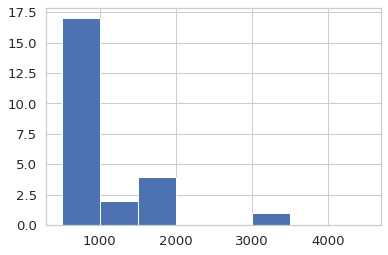

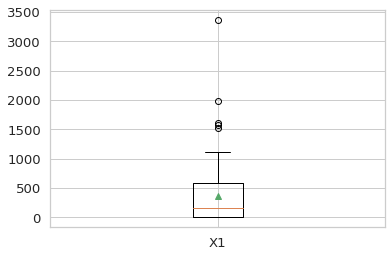

In [72]:
atipicoDF = newDF.copy()
x1_df = atipicoDF["X1"].value_counts() #se crea un nuevo dataframe con solo la información de la columna "X1" analizada


print(str(x1_df))
print("\n")
print("No. de Montos Diferentes: "+str(len(x1_df))+"\n")
print("Montos Menos pedidos: \n"+str(x1_df.nsmallest(5))+"\n")
print("No. de Más pedidos: \n"+str(x1_df.nlargest(5))+"\n")
print("Descripción del set: \n"+str(x1_df.describe())+"\n")
print("\n")



#Se crean las gráficas
credit_bins=[500,1000,1500,2000,2500,3000,3500,4000,4500]
plt.hist(x1_df,bins=credit_bins)
plt.show()
print("\n")
plt.boxplot(x1_df, labels = ["X1"], showmeans= True)
plt.show()




Analisis para "X5" (Edad)

29.0    1605
27.0    1477
28.0    1409
30.0    1395
26.0    1256
31.0    1217
25.0    1186
34.0    1162
32.0    1158
33.0    1146
24.0    1127
35.0    1118
36.0    1108
37.0    1041
39.0     954
38.0     943
23.0     931
40.0     870
41.0     823
42.0     794
44.0     700
43.0     669
45.0     617
46.0     570
22.0     560
47.0     499
48.0     466
49.0     452
50.0     411
51.0     340
53.0     325
52.0     304
54.0     247
55.0     209
56.0     178
58.0     122
57.0     122
59.0      83
60.0      67
21.0      67
61.0      56
62.0      44
63.0      31
64.0      31
66.0      25
65.0      24
67.0      16
69.0      15
70.0      10
68.0       5
73.0       4
72.0       3
75.0       3
71.0       3
79.0       1
74.0       1
Name: X5, dtype: int64


No. de Edades Distintas: 56

Edades con menos aplicaciones: 
79.0    1
74.0    1
72.0    3
75.0    3
71.0    3
Name: X5, dtype: int64

Edades con más aplicaciones: 
29.0    1605
27.0    1477
28.0    1409
30.0    1395
26.0    1256
Name: X5, dtype: 

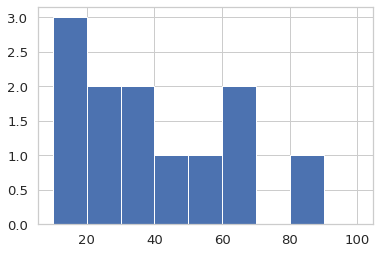

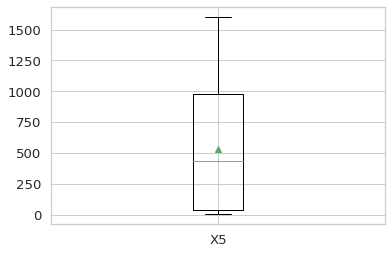

In [73]:
x5_df = np.round(atipicoDF["X5"], decimals=0)
x5_df = x5_df.value_counts()
print(str(x5_df))
print("\n")
print("No. de Edades Distintas: "+str(len(x5_df))+"\n")
print("Edades con menos aplicaciones: \n"+str(x5_df.nsmallest(5))+"\n")
print("Edades con más aplicaciones: \n"+str(x5_df.nlargest(5))+"\n")
print("Descripción del set: \n"+str(x5_df.describe())+"\n")
print("\n")
age_bins = [10,20,30,40,50,60,70,80,90,100]
plt.hist(x5_df, bins=age_bins)
plt.show()
print("\n")
plt.boxplot(x5_df, labels = ["X5"], showmeans= True)
plt.show()